In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
    classification_report, confusion_matrix



In [2]:
train = pd.read_csv('../titanic/cleaned_train.csv')


In [3]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
features = train.drop('Survived',axis=1)
features.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [5]:
labels = train['Survived']
labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
dt_model = tree.DecisionTreeClassifier(min_samples_split=40)


In [7]:
# split data into training and validation set
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state = 42, test_size = 0.2
)

In [8]:
dt_model = dt_model.fit(train_features, train_labels)

In [9]:
predictions = dt_model.predict(test_features)

In [10]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(test_labels, predictions, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.83      0.83       109
       Survived       0.73      0.71      0.72        69

       accuracy                           0.79       178
      macro avg       0.78      0.77      0.77       178
   weighted avg       0.79      0.79      0.79       178



# Changing the min samples to 20

In [11]:
dt_model2 = tree.DecisionTreeClassifier(min_samples_split=20)

In [12]:
dt_model2 = dt_model2.fit(train_features, train_labels)

In [13]:
pred2 = dt_model2.predict(test_features)

In [14]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(test_labels, pred2, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.84      0.79      0.82       109
       Survived       0.70      0.77      0.73        69

       accuracy                           0.78       178
      macro avg       0.77      0.78      0.77       178
   weighted avg       0.79      0.78      0.78       178



# Changing the min samples to 50

In [15]:
dt_model_50 = tree.DecisionTreeClassifier(min_samples_split=50)

In [16]:
dt_model_50 = dt_model_50.fit(train_features, train_labels)

In [17]:
pred_50 = dt_model_50.predict(test_features)

In [18]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(test_labels, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.83      0.83       109
       Survived       0.73      0.71      0.72        69

       accuracy                           0.79       178
      macro avg       0.78      0.77      0.77       178
   weighted avg       0.79      0.79      0.79       178



# Tree Plot

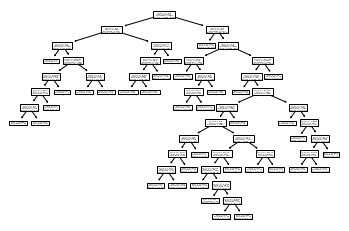

In [19]:
tree.plot_tree(dt_model_50.fit(features, labels));

# Correlations

In [20]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


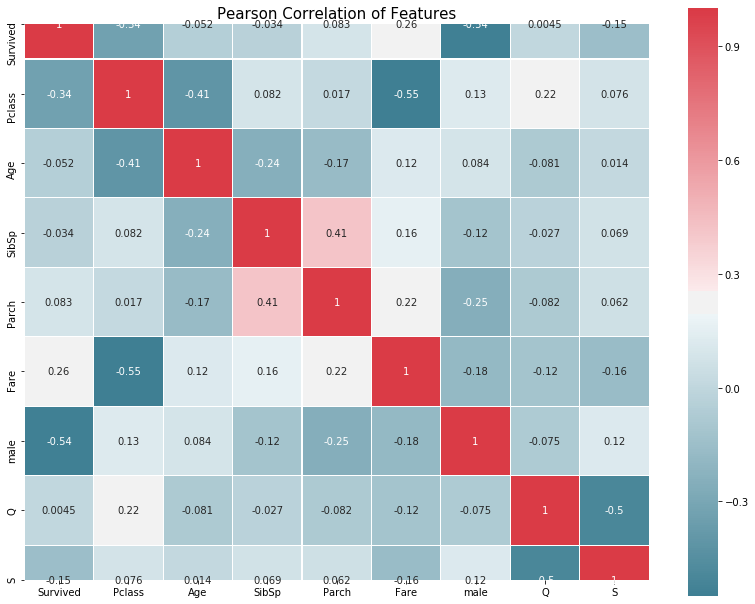

In [21]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

# Confusion Matrix Plot

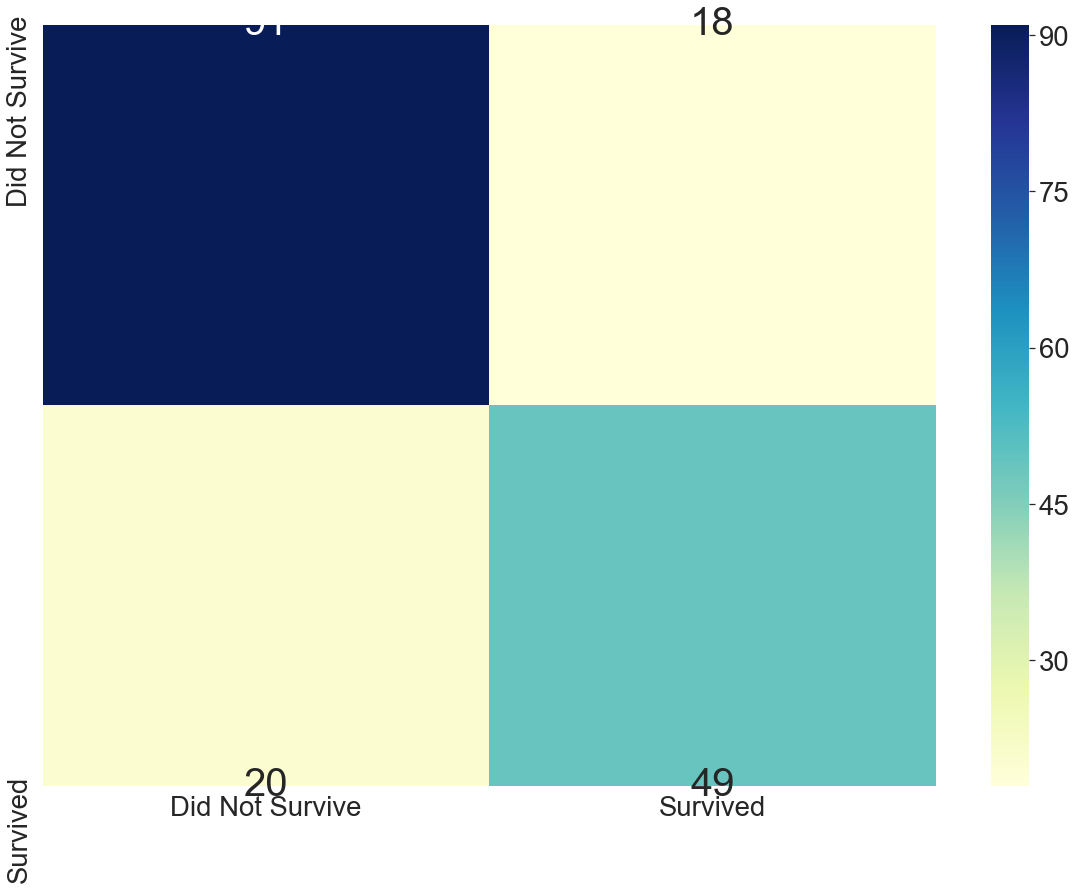

In [22]:
cm = confusion_matrix(test_labels, pred_50)

cm_df = pd.DataFrame(cm, index = {i for i in test_labels}, 
                             columns = {i for i in test_labels})
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu", xticklabels = ["Did Not Survive", "Survived"],
                    yticklabels = ["Did Not Survive", "Survived"])
        
plt.show()

In [23]:
print(cm)

[[91 18]
 [20 49]]


# Models with max depth as the hyperparameter

In [24]:
dt_model_depth_2 = tree.DecisionTreeClassifier(max_depth=2)


In [25]:
dt_model_depth_2 = dt_model_depth_2.fit(train_features, train_labels)

In [26]:
pred_depth_2 = dt_model_depth_2.predict(test_features)

In [27]:
print("Here is the classification report of the Decision Tree Model - Depth 2:")
print(classification_report(test_labels, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model - Depth 2:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.83      0.83       109
       Survived       0.73      0.71      0.72        69

       accuracy                           0.79       178
      macro avg       0.78      0.77      0.77       178
   weighted avg       0.79      0.79      0.79       178



# Max Depth 4

In [28]:
dt_model_depth_4 = tree.DecisionTreeClassifier(max_depth=4)
dt_model_depth_4 = dt_model_depth_4.fit(train_features, train_labels)
pred_depth_4 = dt_model_depth_4.predict(test_features)

In [29]:
print("Here is the classification report of the Decision Tree Model - Depth 4:")
print(classification_report(test_labels, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model - Depth 4:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.83      0.83       109
       Survived       0.73      0.71      0.72        69

       accuracy                           0.79       178
      macro avg       0.78      0.77      0.77       178
   weighted avg       0.79      0.79      0.79       178



# Predictions on Test

In [30]:
test_data = pd.read_csv('../titanic/test.csv')

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [32]:
test_data['Age'] = test_data[['Age','Pclass']].apply(impute_age,axis=1)

In [33]:
test_data.drop('Cabin',axis=1,inplace=True)

In [34]:
test_data.dropna(inplace=True)

In [35]:
sex = pd.get_dummies(test_data['Sex'],drop_first=True)

In [36]:
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)

In [37]:
test_data = pd.concat([test_data,sex,embark],axis=1)

In [38]:
test_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
test_data.to_csv('../titanic/cleaned_test.csv', index = False)

In [40]:
passengerID = test_data['PassengerId']
# passengerID['PassengerId'] = passengerID['PassengerId'].astype(int)

In [41]:
test_data.drop('PassengerId',axis=1,inplace=True)

In [42]:
test_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [43]:
test_predictions = dt_model.predict(test_data)

In [45]:
predict_df = pd.DataFrame(data=test_predictions, columns=['Survived'])
submission = pd.concat([passengerID,predict_df],axis=1)
# submission.astype('int32')

In [46]:
submission.to_csv("../submissions/DT_Submission.csv",index=False)

# Testing with just Fare, Sex and Pclass

In [47]:
feat = train[['Fare','Pclass','male']]

In [48]:
feat.head()

,Fare,Pclass,male
0,7.2500,3,1
1,71.2833,1,0
2,7.9250,3,0
3,53.1000,1,0
4,8.0500,3,1


In [49]:
train_features, test_features, train_labels, test_labels = train_test_split(
    feat, labels, random_state = 42, test_size = 0.1
)

In [50]:
dt_smaller = tree.DecisionTreeClassifier(min_samples_split=40)


In [51]:
dt_smaller = dt_smaller.fit(train_features, train_labels)

In [52]:
pred_smaller = dt_smaller.predict(test_features)

In [53]:
print(accuracy_score(test_labels,pred_smaller))

0.8089887640449438


In [54]:
print(recall_score(test_labels,pred_smaller))

0.8064516129032258


In [55]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(test_labels, pred_smaller, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.89      0.81      0.85        58
       Survived       0.69      0.81      0.75        31

       accuracy                           0.81        89
      macro avg       0.79      0.81      0.80        89
   weighted avg       0.82      0.81      0.81        89



In [56]:
smaller_test = test_data[['Fare','Pclass','male']]

In [57]:
test_predictions = dt_smaller.predict(smaller_test)

In [58]:
predict_df = pd.DataFrame(data=test_predictions, columns=['Survived'])
submission = pd.concat([passengerID,predict_df],axis=1)

In [59]:
submission.to_csv("../submissions/DT_Submission_Less_Features.csv",index=False)